In [1]:
import pandas as pd
import numpy  as np

In [2]:
casurl = 'https://data.rivm.nl/covid-19/'
casfil = 'COVID-19_casus_landelijk.csv'

url = casurl + casfil

!wget -N $url

--2023-10-31 09:11:05--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 131.224.250.75, 2001:610:430:ffff::16:198
Connecting to data.rivm.nl (data.rivm.nl)|131.224.250.75|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19_casus_landelijk.csv’ not modified on server. Omitting download.



In [3]:
df_case = pd.read_csv(
    casfil,
    sep=';',
    parse_dates=[1, 2],
    infer_datetime_format=True,
)
(
    df_case
    .tail(5)
    .transpose()
    .loc[:, ::-1]
)

6594021              6594020  \
Version                                     7                    7   
Date_file                 2023-03-31 10:00:00  2023-03-31 10:00:00   
Date_statistics           2023-03-31 00:00:00  2023-03-31 00:00:00   
Date_statistics_type                      DPL                  DPL   
Agegroup                                60-69                20-29   
Sex                                    Female                 Male   
Province                              Utrecht           Overijssel   
Deceased                              Unknown              Unknown   
Week_of_death                             NaN                  NaN   
Municipal_health_service    GGD Regio Utrecht       GGD IJsselland   

                                        6594019              6594018  \
Version                                       7                    7   
Date_file                   2023-03-31 10:00:00  2023-03-31 10:00:00   
Date_statistics             2023-03-31 00:00:00  2023-03-31 00:00:00   
Date_statistics_type                        DPL                  DPL   
Agegroup                                  50-59                80-89   
Sex                                        Male               Female   
Province                          Noord-Brabant              Drenthe   
Deceased                                Unknown              Unknown   
Week_of_death                               NaN                  NaN   
Municipal_health_service  GGD Hart voor Brabant          GGD Drenthe   

                                                                    6594017  
Version                                                                   7  
Date_file                                               2023-03-31 10:00:00  
Date_statistics                                         2023-03-31 00:00:00  
Date_statistics_type                                                    DPL  
Agegroup                                                              10-19  
Sex                                                                  Female  
Province                                                         Gelderland  
Deceased                                                            Unknown  
Week_of_death                                                           NaN  
Municipal_health_service  Veiligheids- en Gezondheidsregio Gelderland-Mi...

In [4]:
# Define period labels
df_case['period'] = (
    (
        (
            df_case
            ['Date_statistics']
            .dt
            .isocalendar()
            .year
            * 100
        )
        +
        (
            df_case
            ['Date_statistics']
            .dt
            .isocalendar()
            .week
        )
    )
    .apply(str)
    .apply(
        lambda x: (
            x[:4]
            + 'W'
            + x[4:]
        )
    )
)
# Define group labels
df_case['groups'] = (
    (
        df_case
        ['Sex']
        + ' '
    )
    +
    (
        df_case
        ['Agegroup']
    )
)
(
    df_case
    .tail(5)
#    .head(5)
    .transpose()
    .loc[:, ::-1]
)

6594021              6594020  \
Version                                     7                    7   
Date_file                 2023-03-31 10:00:00  2023-03-31 10:00:00   
Date_statistics           2023-03-31 00:00:00  2023-03-31 00:00:00   
Date_statistics_type                      DPL                  DPL   
Agegroup                                60-69                20-29   
Sex                                    Female                 Male   
Province                              Utrecht           Overijssel   
Deceased                              Unknown              Unknown   
Week_of_death                             NaN                  NaN   
Municipal_health_service    GGD Regio Utrecht       GGD IJsselland   
period                                2023W13              2023W13   
groups                           Female 60-69           Male 20-29   

                                        6594019              6594018  \
Version                                       7                    7   
Date_file                   2023-03-31 10:00:00  2023-03-31 10:00:00   
Date_statistics             2023-03-31 00:00:00  2023-03-31 00:00:00   
Date_statistics_type                        DPL                  DPL   
Agegroup                                  50-59                80-89   
Sex                                        Male               Female   
Province                          Noord-Brabant              Drenthe   
Deceased                                Unknown              Unknown   
Week_of_death                               NaN                  NaN   
Municipal_health_service  GGD Hart voor Brabant          GGD Drenthe   
period                                  2023W13              2023W13   
groups                               Male 50-59         Female 80-89   

                                                                    6594017  
Version                                                                   7  
Date_file                                               2023-03-31 10:00:00  
Date_statistics                                         2023-03-31 00:00:00  
Date_statistics_type                                                    DPL  
Agegroup                                                              10-19  
Sex                                                                  Female  
Province                                                         Gelderland  
Deceased                                                            Unknown  
Week_of_death                                                           NaN  
Municipal_health_service  Veiligheids- en Gezondheidsregio Gelderland-Mi...  
period                                                              2023W13  
groups                                                         Female 10-19

In [5]:
# Pivot to period rows with group columns
df_heat = (
    df_case
    [
        df_case
        ['Municipal_health_service']
        != ''
    ]
    .pivot_table(
        index='period',
        columns='groups',
        values='Date_statistics',
        aggfunc='count',
    )
    .fillna(0)
)
# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = (
#    df_heat[df_heat.columns[0:24]]
#    .sum(axis=1)
#)
df_heat = (
    df_heat
    [
        df_heat
        .columns[0:24]
    ]
    .loc['2022W14':]
#    .loc['2020W26':]
#    .loc['2022W20':]
#    .loc['2022W22':]
#    .loc['2021W01':]
#    .loc['2022W01':]
#    .div(
#        df_heat['total'],
#        axis='index',
#    )
)
# Use this for relative growth numbers
#df_heat = df_heat / df_heat.shift()
(
    df_heat
    .tail(5)
    .loc[::-1]
    .transpose()
)

period          2023W13  2023W12  2023W11  2023W10  2023W09
groups                                                     
Female 0-9         10.0     49.0     45.0     56.0     45.0
Female 10-19        4.0     10.0     12.0     30.0     32.0
Female 20-29       12.0     20.0     51.0     99.0    151.0
Female 30-39       11.0     25.0     78.0    156.0    154.0
Female 40-49       14.0     36.0    108.0    155.0    176.0
Female 50-59       24.0     65.0    134.0    197.0    256.0
Female 60-69       64.0    133.0    159.0    258.0    263.0
Female 70-79       87.0    219.0    281.0    370.0    430.0
Female 80-89       97.0    259.0    356.0    504.0    511.0
Female 90+         29.0     93.0    116.0    221.0    257.0
Female <50          0.0      0.0      0.0      0.0      0.0
Female Unknown      0.0      0.0      0.0      0.0      0.0
Male 0-9           16.0     52.0     52.0     62.0     62.0
Male 10-19          5.0      4.0     18.0     27.0     32.0
Male 20-29          7.0     13.0     24.0     64.0     91.0
Male 30-39          8.0     21.0     47.0    112.0    104.0
Male 40-49          9.0     30.0     58.0     96.0    114.0
Male 50-59         34.0     64.0    110.0    174.0    181.0
Male 60-69         69.0    126.0    170.0    247.0    268.0
Male 70-79        119.0    270.0    332.0    447.0    470.0
Male 80-89        119.0    227.0    334.0    413.0    412.0
Male 90+           25.0     59.0     66.0     95.0    121.0
Male <50            0.0      0.0      0.0      0.0      0.0
Male Unknown        0.0      0.0      0.0      0.0      0.0

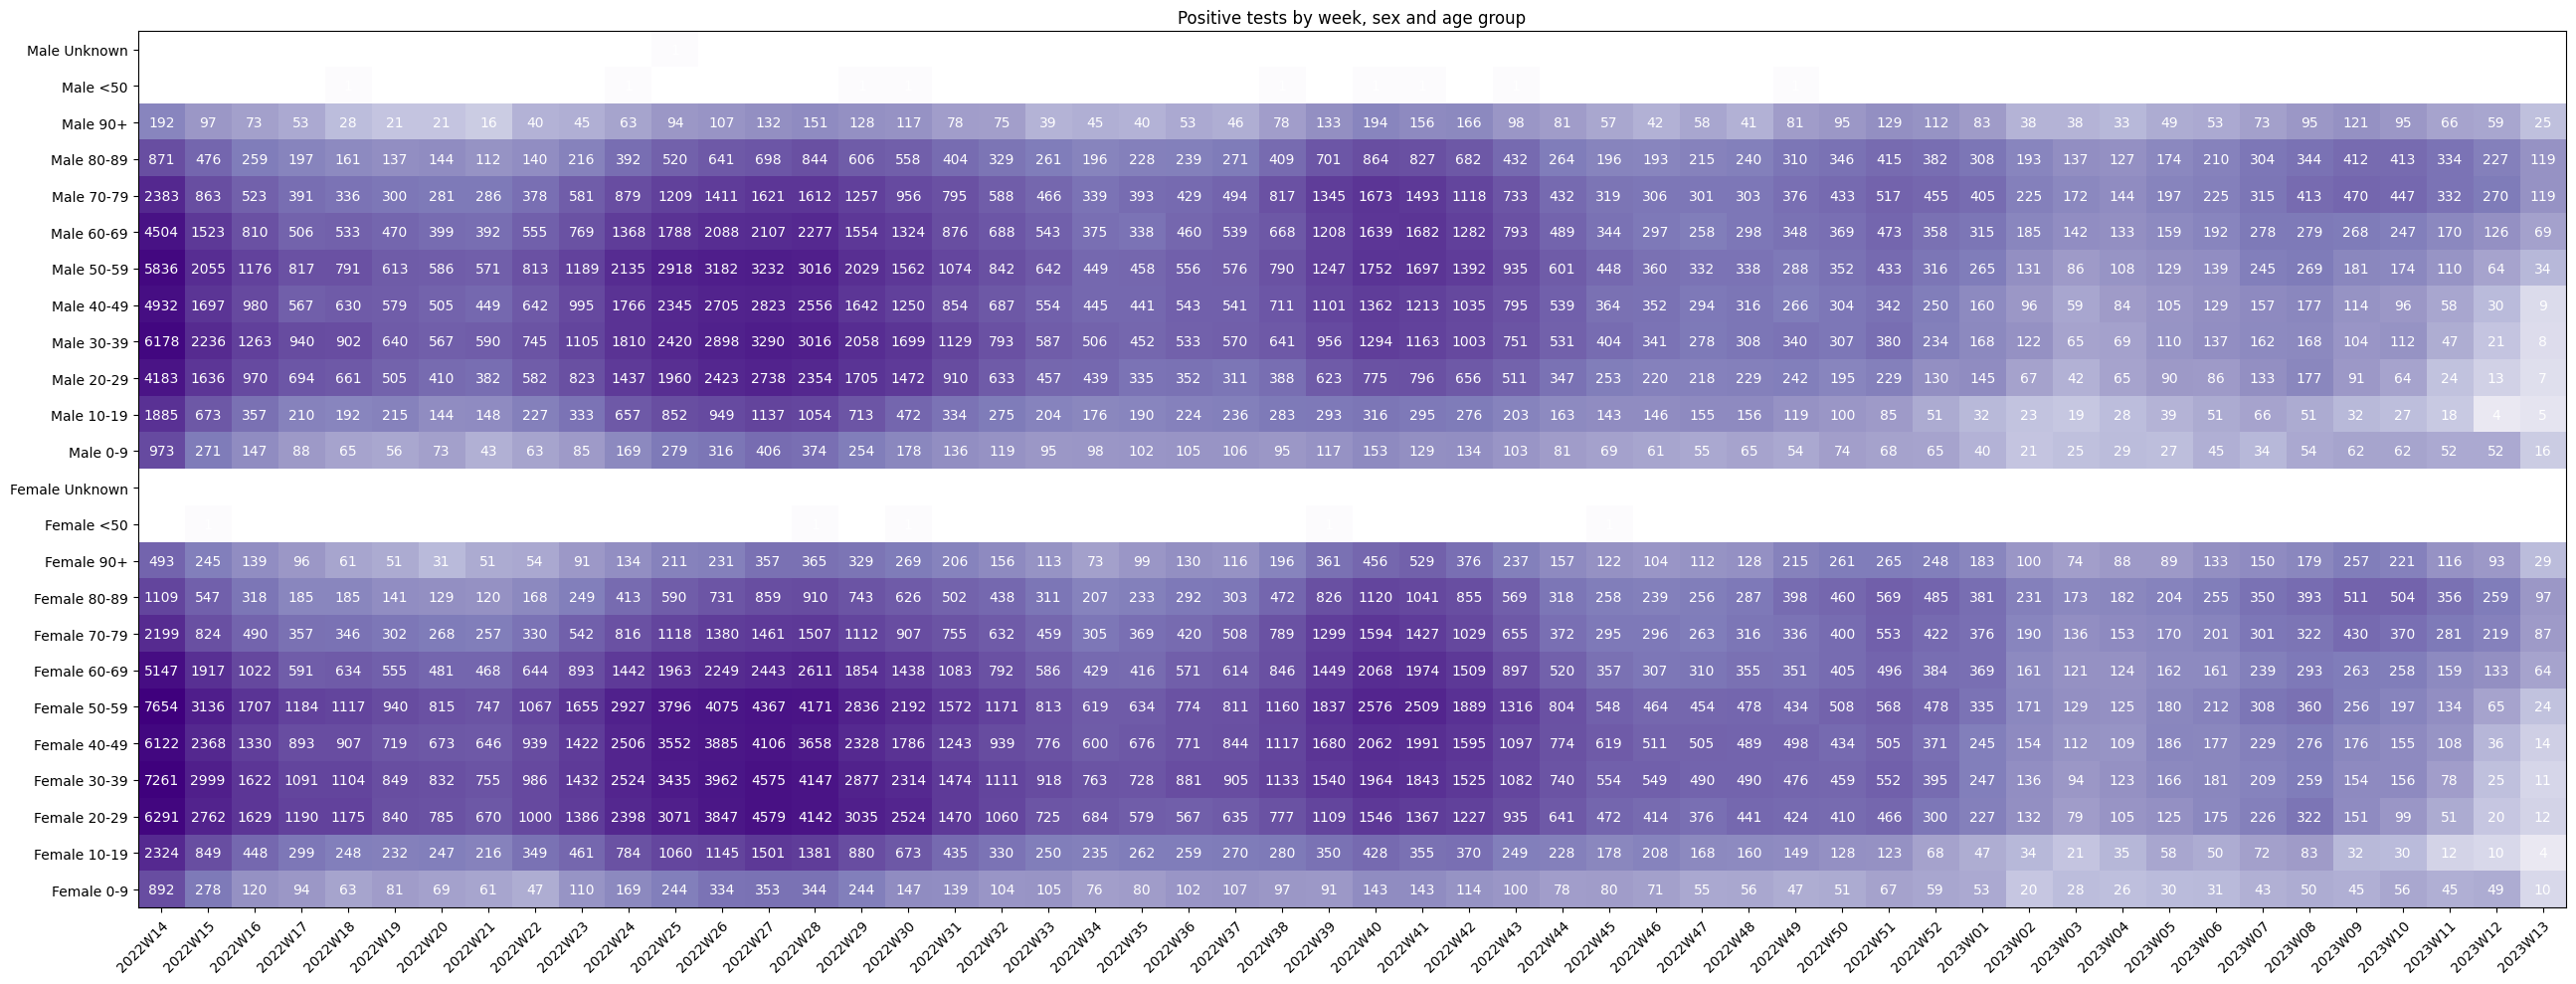

In [6]:
import matplotlib.pyplot as plt

# Define arrays of row and column headers
periods   = df_heat.index
agegroups = df_heat.columns

# Output size may have to be adjusted to data length eventually
fig, ax = plt.subplots(
    figsize=(26, 10),
)

# Heatmap on transposed data, X-axis inverted
heatmap = plt.imshow(
    np.log(
        df_heat
        [df_heat > 0]
        .loc[:]
        .transpose()
    ),
    cmap='Purples',
    interpolation='nearest',
    aspect='auto',
    origin='lower',
)

# Every value is an axis tick
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
)

# Convert dataframe to numpy format
np_heat = (
    df_heat
    .to_numpy()
)

# Set numbers as text labels
for i in range(len(periods)):
    for j in range(len(agegroups)):
        text = ax.text(
            i, j,
            int(np_heat[i, j]),
            ha='center',
            va='center',
            color='w',
        )

ax.set_title('Positive tests by week, sex and age group')
fig.tight_layout()
plt.show()